# Dataset: Company Bankruptcy
The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange.

https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction?resource=download

In [3]:
# Import important libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

### 1. Load Data

In [5]:
data = pd.read_csv('data.csv')

### 2. Basic EDA

In [7]:
# To check if csv file is imported correctly
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [8]:
# Check the vital statistics of the dataset
print("Data type : ", type(data))
print("Data dims : ", data.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (6819, 96)


`Bankrupt?` may be a categorical variable so check below

In [10]:
# Count the number of unique values
num_unique = data['Bankrupt?'].nunique()
print("Number of unique values:", num_unique)

# Check unique values in the 'Bankrupt?' column
unique_values = data['Bankrupt?'].unique()
print("Unique values in 'Bankrupt?' column:", unique_values)


Number of unique values: 2
Unique values in 'Bankrupt?' column: [1 0]


`Bankrupt?` is a categorical variable with only two distinct values (0 and 1)

Since the dataset contains 95 variable, we aim to narrow our focus and will explore the correlations between these variables and `Bankrupt?`


In [13]:
# Compute absolute correlations with 'Bankrupt?'
correlations = data.corr()['Bankrupt?'].abs().sort_values(ascending=False)

# Print all correlation values
print("Correlations of all variables with 'Bankrupt?':\n", correlations)


Correlations of all variables with 'Bankrupt?':
 Bankrupt?                                                   1.000000
 Net Income to Total Assets                                 0.315457
 ROA(A) before interest and % after tax                     0.282941
 ROA(B) before interest and depreciation after tax          0.273051
 ROA(C) before interest and depreciation before interest    0.260807
                                                              ...   
 Long-term Liability to Current Assets                      0.000778
 Cash Flow to Sales                                         0.000479
 Realized Sales Gross Profit Growth Rate                    0.000458
 Operating Profit Rate                                      0.000230
 Net Income Flag                                                 NaN
Name: Bankrupt?, Length: 96, dtype: float64


In [14]:
# Observe the top 10 correlated features (excluding 'Bankrupt?')
topFeatures = correlations.index[1:11]  
topCorrelations = correlations[1:11]  # Get their correlation values

# Print the top 10 correlated features with values
print("\nTop 10 correlated features with 'Bankrupt?':")
for feature, value in zip(topFeatures, topCorrelations):
    print(f"{feature}: {value:.4f}")


Top 10 correlated features with 'Bankrupt?':
 Net Income to Total Assets: 0.3155
 ROA(A) before interest and % after tax: 0.2829
 ROA(B) before interest and depreciation after tax: 0.2731
 ROA(C) before interest and depreciation before interest: 0.2608
 Net worth/Assets: 0.2502
 Debt ratio %: 0.2502
 Persistent EPS in the Last Four Seasons: 0.2196
 Retained Earnings to Total Assets: 0.2178
 Net profit before tax/Paid-in capital: 0.2079
 Per Share Net profit before tax (Yuan ¥): 0.2014


### Selection of 6 Features

When selecting the top features for predicting bankruptcy, we considered **correlation strength** and **economic relevance** to financial distress. While several variables show high correlation with `Bankrupt?`, we selected:  

1. **Net Income to Total Assets**  
2. **ROA(A) before interest and % after tax**  
3. **Debt ratio %**  
4. **Net worth/Assets**  
5. **Persistent EPS in the Last Four Season**  
6. **Retained Earnings to Total Assets** 

#### 1. Correlation Strength  
- The six selected variables are among the top correlated features with bankruptcy.  
- Their correlations range from **0.3155 to 0.2178**, indicating relatively strong relationships with financial distress.  

#### 2. Economic & Financial Interpretability  
- **Net Income to Total Assets**: Measures overall profitability relative to assets—strong indicator of financial health.  
- **ROA(A) before interest and % after tax**: Shows how efficiently assets generate profit—important for assessing long-term viability.  
- **Debt ratio %**: Indicates leverage and financial risk—higher values suggest insolvency risks.  
- **Net worth/Assets**: Reflects financial stability—low values imply excessive liabilities.  
- **Persistent EPS in the Last Four Seasons**: Earnings Per Share over time signals long-term profitability trends.  
- **Retained Earnings to Total Assets**: Represents accumulated profits—low values mean financial weakness. 

#### Why Exclude the Others?
| **Feature** | **Reason for Exclusion** |  
|------------|-------------------------|  
| **ROA(B) before interest and depreciation after tax (0.2731)** | Similar to ROA(A), redundant information. |  
| **ROA(C) before interest and depreciation before interest (0.2608)** | Also a variant of ROA; A & C are highly correlated. |  

### 3. Extract the Selected Features

In [21]:
# Strip leading/ trailing spaces from column names
data.columns = data.columns.str.strip()

# List of the original column names
columns_to_extract = ['Bankrupt?', 'Net Income to Total Assets', 
                      'ROA(A) before interest and % after tax',
                      'Debt ratio %', 'Net worth/Assets', 
                      'Persistent EPS in the Last Four Seasons',
                      'Retained Earnings to Total Assets']

# Extract the selected columns
df = data[columns_to_extract]

# Rename the columns to simpler names
df = df.rename(columns={
    'Bankrupt?': 'Bankrupt?',
    'Net Income to Total Assets': 'NetIncome_to_Assets',
    'ROA(A) before interest and % after tax': 'ROA_A',
    'Debt ratio %': 'DebtRatio',
    'Net worth/Assets': 'NetWorth_to_Assets',
    'Persistent EPS in the Last Four Seasons': 'EPS',
    'Retained Earnings to Total Assets': 'Earnings_to_Assets'
})

# Check
df.head()

,Bankrupt?,NetIncome_to_Assets,ROA_A,DebtRatio,NetWorth_to_Assets,EPS,Earnings_to_Assets
0,1,0.716845,0.424389,0.207576,0.792424,0.169141,0.903225
1,1,0.795297,0.538214,0.171176,0.828824,0.208944,0.931065
2,1,0.774670,0.499019,0.207516,0.792484,0.180581,0.909903
3,1,0.739555,0.451265,0.151465,0.848535,0.193722,0.906902
4,1,0.795016,0.538432,0.106509,0.893491,0.212537,0.913850


### 4. EDA on Selected Features

#### 1. Summary Statistics

In [24]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
         Bankrupt?  NetIncome_to_Assets        ROA_A    DebtRatio  \
count  6819.000000          6819.000000  6819.000000  6819.000000   
mean      0.032263             0.807760     0.558625     0.113177   
std       0.176710             0.040332     0.065620     0.053920   
min       0.000000             0.000000     0.000000     0.000000   
25%       0.000000             0.796750     0.535543     0.072891   
50%       0.000000             0.810619     0.559802     0.111407   
75%       0.000000             0.826455     0.589157     0.148804   
max       1.000000             1.000000     1.000000     1.000000   

       NetWorth_to_Assets          EPS  Earnings_to_Assets  
count         6819.000000  6819.000000         6819.000000  
mean             0.886823     0.228813            0.934733  
std              0.053920     0.033263            0.025564  
min              0.000000     0.000000            0.000000  
25%              0.851196     0.214711            0.9

#### 2. Missing Values Check

In [26]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Bankrupt?              0
NetIncome_to_Assets    0
ROA_A                  0
DebtRatio              0
NetWorth_to_Assets     0
EPS                    0
Earnings_to_Assets     0
dtype: int64


#### 3. Categorical and Numerical Features

In [28]:
print("\nCategorical Features:")
print(df.select_dtypes(include=['object']).columns)

print("\nNumerical Features:")
print(df.select_dtypes(include=['number']).columns)


Categorical Features:
Index([], dtype='object')

Numerical Features:
Index(['Bankrupt?', 'NetIncome_to_Assets', 'ROA_A', 'DebtRatio',
       'NetWorth_to_Assets', 'EPS', 'Earnings_to_Assets'],
      dtype='object')


Looks like `Bankrupt?` is not encoded as a categorial variable so we convert it

In [30]:
df['Bankrupt?'] = df['Bankrupt?'].astype('category')

# Check
print("\nCategorical Features:")
print(df.select_dtypes(include=['category']).columns)

print("\nNumerical Features:")
print(df.select_dtypes(include=['number']).columns)



Categorical Features:
Index(['Bankrupt?'], dtype='object')

Numerical Features:
Index(['NetIncome_to_Assets', 'ROA_A', 'DebtRatio', 'NetWorth_to_Assets',
       'EPS', 'Earnings_to_Assets'],
      dtype='object')


#### 4. Distribution of 'Bankrupt?'


Distribution of Bankrupt:
Bankrupt?
0    6599
1     220
Name: count, dtype: int64


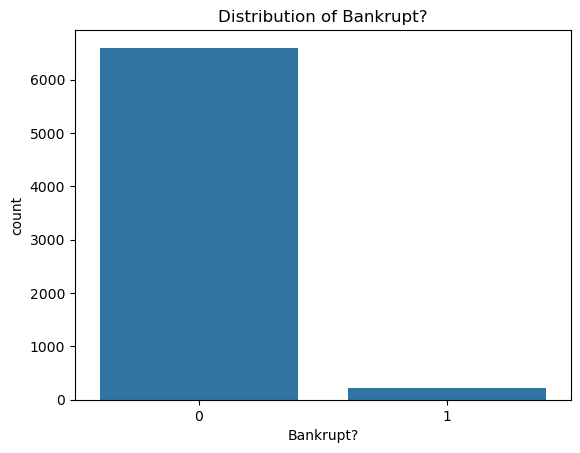

In [32]:
print("\nDistribution of Bankrupt:")
print(df['Bankrupt?'].value_counts())

# Plot the distribution of 'Bankrupt?'
sb.countplot(x='Bankrupt?', data=df)
plt.title('Distribution of Bankrupt?')
plt.show()

#### Imbalance in the 'Bankrupt?' Variable

Upon examining the distribution of the `Bankrupt?` variable, we observe a **significant class imbalance**, with 6,599 non-bankrupt cases (represented by 0) and only 220 bankrupt cases (represented by 1). 

This imbalance could affect the performance of machine learning models, as they might be biased toward predicting the majority class (non-bankrupt) and fail to capture the minority class (bankrupt) effectively. 

Therefore, it is essential to address this issue, possibly through techniques like oversampling, undersampling, or adjusting class weights during the modeling phase.


#### 5. Box Plot

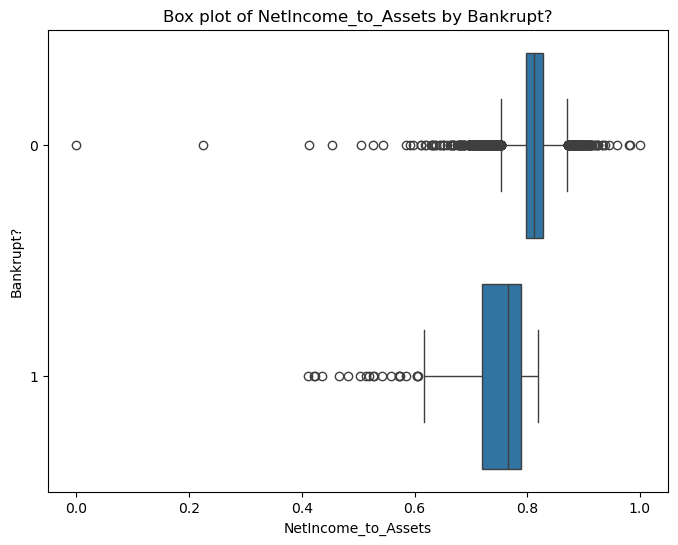

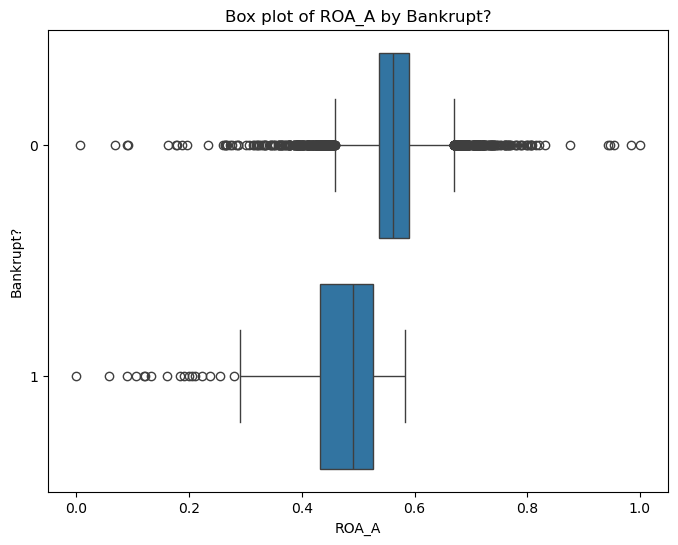

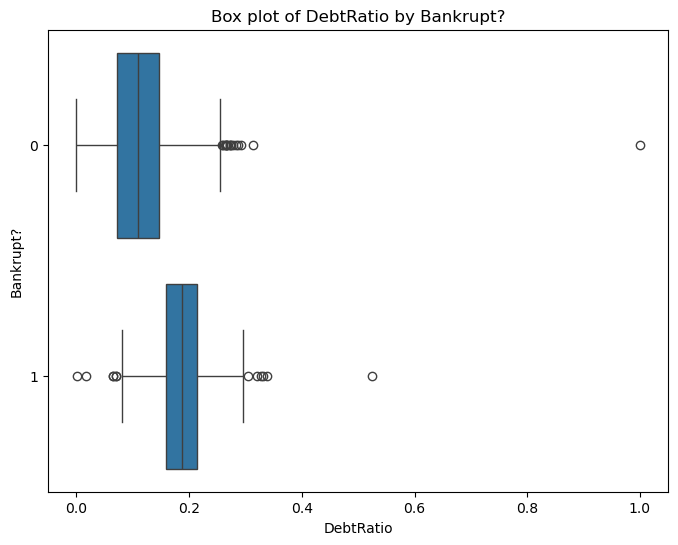

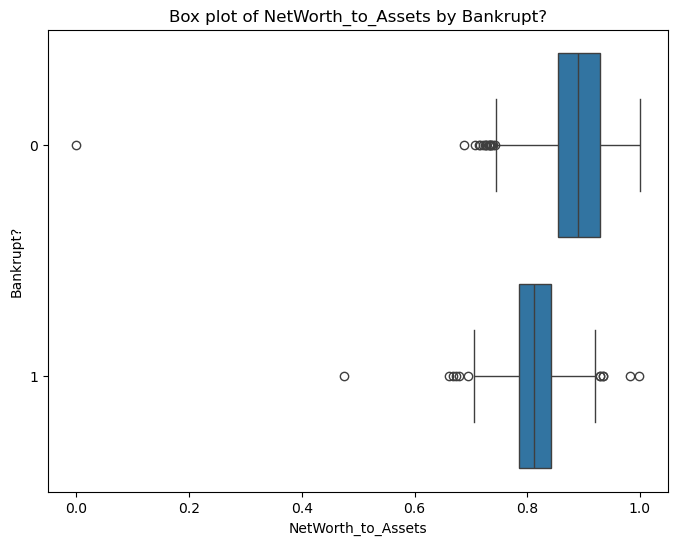

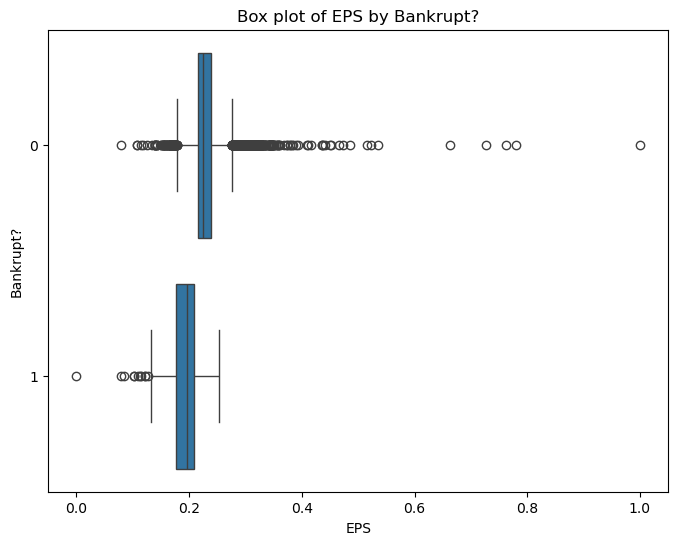

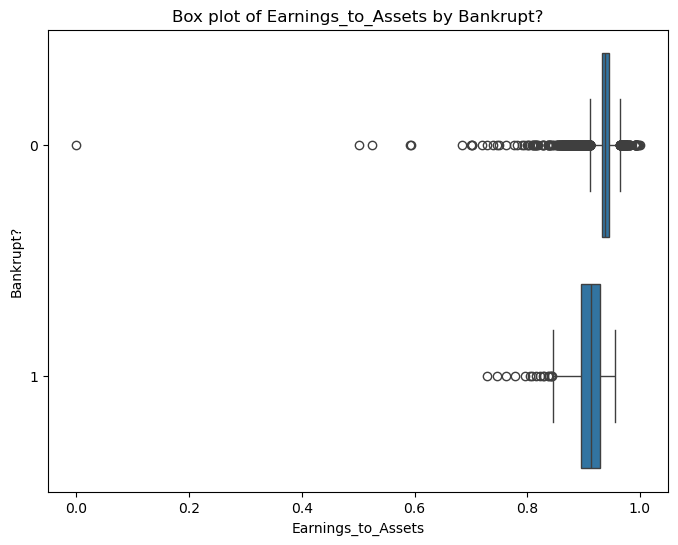

In [35]:
numericalFeatures = df.select_dtypes(include=['number']).columns

for feature in numericalFeatures:
    plt.figure(figsize=(8, 6))
    sb.boxplot(y='Bankrupt?', x=feature, data=df) 
    plt.title(f'Box plot of {feature} by Bankrupt?')
    plt.show()

#### 6. Violin Plot

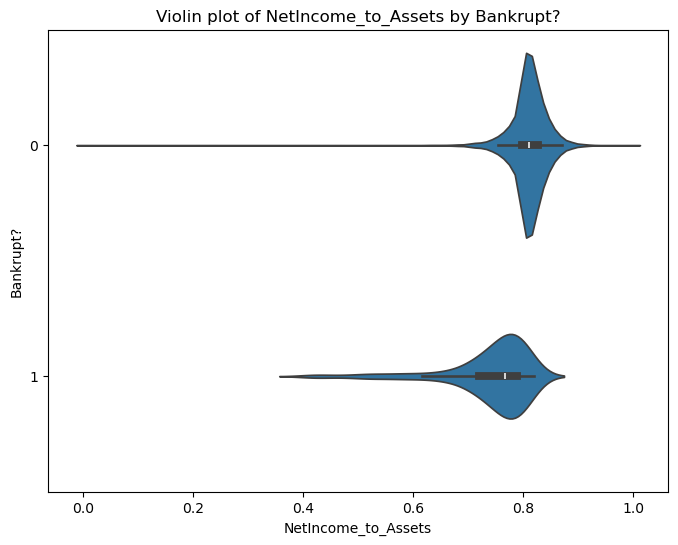

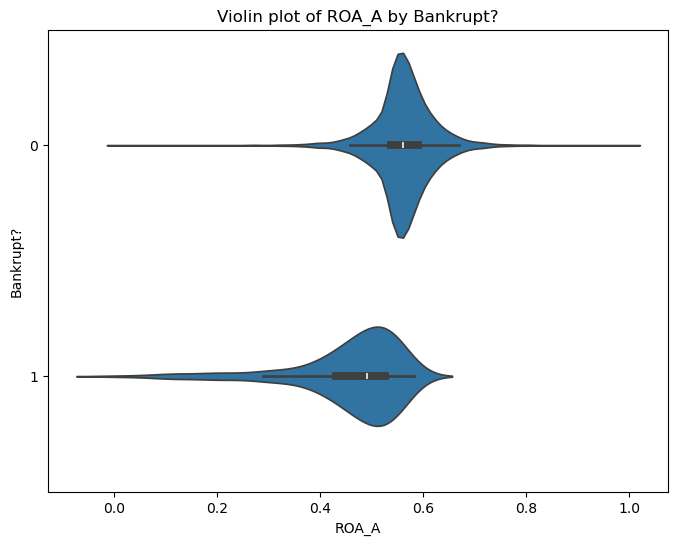

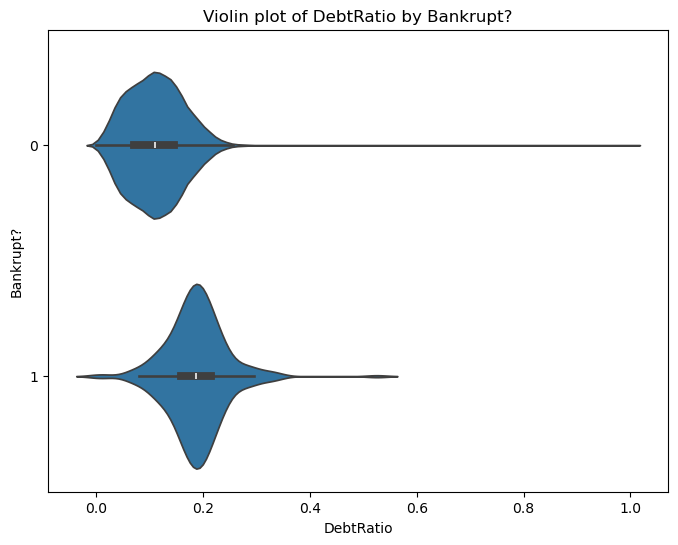

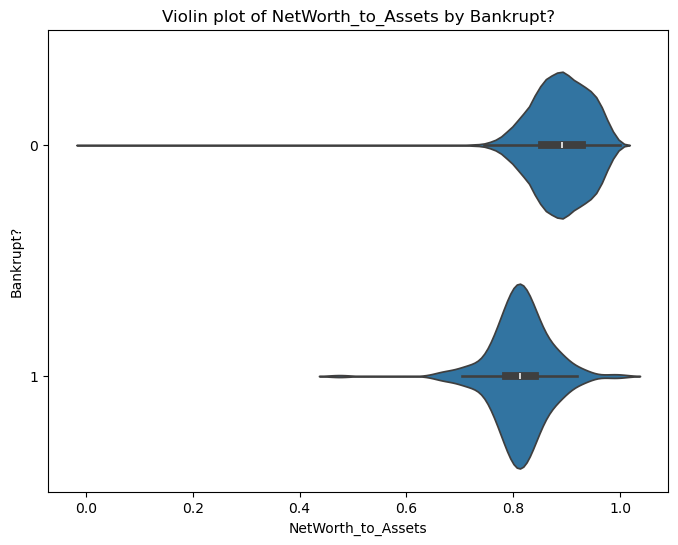

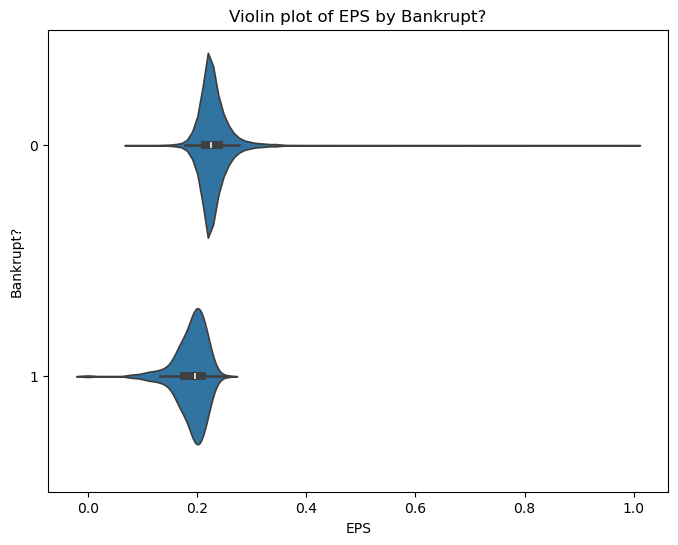

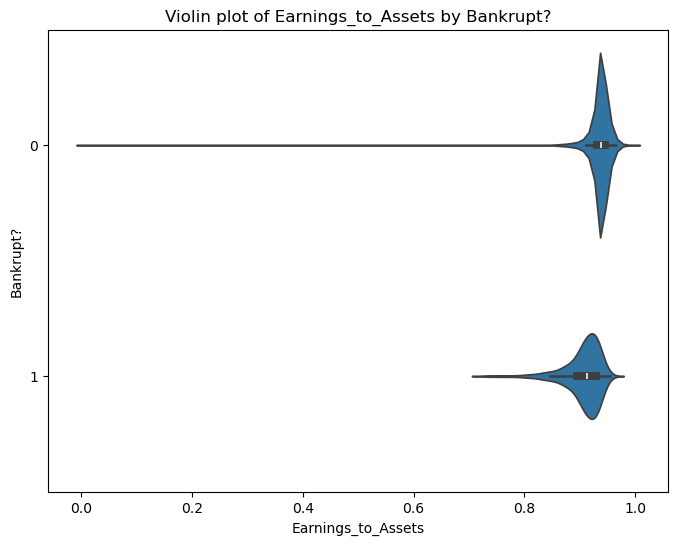

In [37]:
for feature in numericalFeatures:
    plt.figure(figsize=(8, 6))
    sb.violinplot(y='Bankrupt?', x=feature, data=df)  
    plt.title(f'Violin plot of {feature} by Bankrupt?')
    plt.show()

#### 7. Correlation Matrix

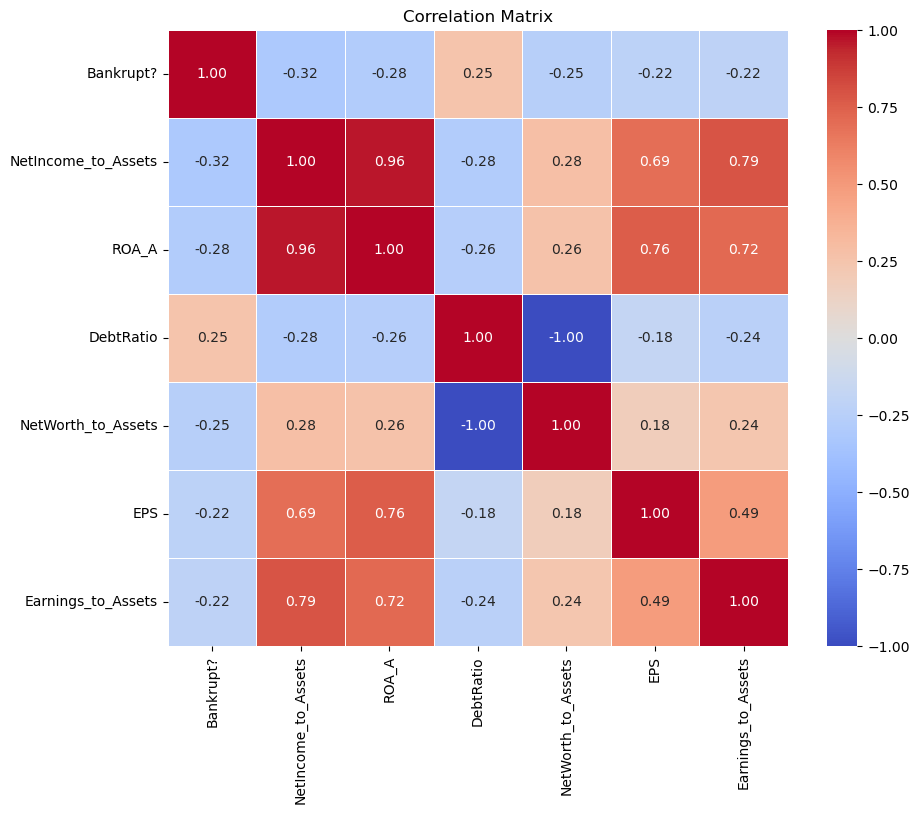

In [39]:
# Calculate the correlation matrix for the features
corr_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


#### 8. Outliers

In [41]:
# Define function to detect and print number of outliers using IQR
def detectOutliers(df, features):
    outlier_indices = set()
    
    print("\nOutlier count per feature:")
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Get outlier indices for this feature
        feature_outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)].index
        outlier_indices.update(feature_outliers)
        
        # Print number of outliers detected for this feature
        print(f" {feature}: {len(feature_outliers)}")
    
    return list(outlier_indices)


In [42]:
# Detect and print outliers per feature
outlierIndices = detectOutliers(df, numericalFeatures)


Outlier count per feature:
 NetIncome_to_Assets: 561
 ROA_A: 561
 DebtRatio: 30
 NetWorth_to_Assets: 30
 EPS: 508
 Earnings_to_Assets: 633


### 5. Removing Outliers from Dataset

#### Why We Remove Outliers Before Machine Learning

Outliers can distort the relationships in the data, making it harder for the model to identify meaningful patterns. Removing them helps the model to learn more accurate relationships, improving its overall performance and ability to generalize to new, unseen data.


In [45]:
# Remove outliers from dataset
dfCleaned = df.drop(index=outlierIndices).reset_index(drop=True)

# Show shape before and after removing outliers
print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after removing outliers: {dfCleaned.shape}")


Original dataset shape: (6819, 7)
Dataset shape after removing outliers: (5731, 7)


### 6. Export Cleaned Dataset

In [47]:
dfCleaned.to_csv('finalData.csv', index=False)
print("\nCleaned dataset exported as 'finalData.csv'")


Cleaned dataset exported as 'finalData.csv'
